## Problem Set 2: Merging and regular expressions

**Total points (without extra credit)**: 30 

**Background on the policy context**: here, we're going to use two datasets to practice reshaping, merging, and regular expression patterns. Both datasets relate to the broader issue of which employers might be violating the rights of temporary guestworkers granted visas under the H-2A program. Here are some articles about potential exploitation of guestworkers by firms and inequality caused by minimal oversight:

- News media coverage of labor abuses of temporary guestworkers: https://www.buzzfeednews.com/article/kenbensinger/the-pushovers 
- GAO report on labor abuses of temporary guestworkers: https://www.gao.gov/products/gao-15-154

The following datasets are located in `pset2_inputdata` (need to unzip): 

- `jobs_clean`: a dataset of guestworker jobs posted by many employers, some of whom have been debarred (banned) from the program for labor abuses; others not debarred
- `debar`: a dataset of employers who committed violations of labor regulations meant to protect temporary guestworkers 


You can view a codebook here: https://docs.google.com/spreadsheets/d/1rF9GJEC8pPKxipD0TsoG9DVdqz3EJ-b-BHEtyioAX7I/edit?usp=sharing


In [ ]:
## helpful packages
import pandas as pd
import numpy as np
import random
import re
import os

## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1. Reshaping data (13 points total)

Load the following dataset stored in `pset2_inputdata`: `debar.csv`

This represents employers temporarily banned from hiring workers (debar.csv); call this `debar`


View the head()


In [14]:
debar = pd.read_csv("/Users/katinachristensen/Documents/GitHub/QSS20_S24/christensen_work/pset2_inputdata/debar.csv")
debar.head()

,Name,"City, State",Violation,Duration,Start date,End date
0,J&J Harvesting,"Leads, ND",Failure to respond to audit (partial response),2 years,1/19/2014,1/18/2016
1,"Stahlman Apiaries, Inc","Selby, SD",Failure to respond to audit (partial response),1 year,2/19/2015,2/14/2016
2,Trust Nursery,"Pulaski, NY",Failure to respond to audit (partial response),1 year,3/21/2014,3/20/2015
3,Anton Fertilizer Inc.,"Dighton, KS",Failure to respond to audit (no response),2 years,3/30/2014,3/29/2016
4,"Great Plains Fluid Service, Inc.","Greensburg, KS",Failure to respond to audit (no response),2 years,3/30/2014,3/29/2016


## 1.1 (1 point)

Print the number of rows in `debar` versus the number of unique employer names (`Name`). Is there one row per employer or multiple rows for some employers?

In [15]:
#number of rows in the dataframe
num_rows = len(debar)
print("The number of rows in debar is: " + str(num_rows)) 

#number of unique employer names
num_unique_employers = debar['Name'].nunique()
print("The number of unique employer names in debar is: " + str(num_unique_employers)) 

The number of rows in debar is: 114
The number of unique employer names in debar is: 98


## Is there one row per employer or multiple rows for some employers?
- Given that there are 114 rows in the dataframe and only 98 unique employer names, it appears that there are multiple rows for some employers

## 1.2 Investigating duplicated rows (2 points)

A. Create a new column in `debar`--`is_repeated`-- that tells us whether an employer (`Name`) is repeated > 1 times

*Hint*: there are multiple ways to solve this but some possibilities to get the list of names that are repeated are:
- Using value_counts() on the `Name` variable and extracting the index from that value counts 
- Using groupby to count the rows attached to one name

B. Print the rows where `is_repeated == True` and interpret

C. Subset to the rows where `is_repeated == True` and save that data as `mult_debar`. Print the head() and shape

In [16]:
#creating the variable is_repeated for employers who have committed more than once violation 
debar['is_repeated'] = debar['Name'].duplicated(keep=False)

#print the rows where is_repeated == True 
repeated_employers = debar[debar['is_repeated'] == True]
repeated_employers 

,Name,"City, State",Violation,Duration,Start date,End date,is_repeated
6,Annabella Land & Cattle,"Annabella, UT",Non Payment,1 year,5/9/2014,5/9/2015,True
7,Autumn Hill Orchard,"Groton, MA",Failure to respond to audit (no response),2 years,7/6/2014,7/5/2016,True
8,"Caddo Creek Ranch, dba Paradise Ranch","Caddo, TX",Failure to respond to audit (partial response),2 years,7/20/2014,7/19/2016,True
11,Loewen Harvesting LLC,"Brownsville, TX",Failure to respond to audit (partial response),1 year,8/20/2014,8/19/2015,True
12,Rollo Farm Labor Contractor,"Miami, FL",Failure to respond to audit (no response),2 years,8/23/2014,8/22/2016,True
14,Sharon Mathis,"Tifton, GA",Failure to respond to audit (no response),2 years,11/16/2014,11/15/2016,True
15,SRT Farms,"Morton, TX",Failure to respond to audit (no response),2 years,11/16/2014,11/15/2016,True
16,Mark Duncan,"Roosevelt, UT",Failure to respond to audit (no response),2 years,11/16/2014,11/15/2016,True
17,"Maple Ridge Custom Services, LLC","Altheimer, AK",Failure to respond to audit (partial response),2 years,11/16/2014,11/15/2016,True
18,F&W Farms,"Ingalls, KS",Failure to respond to audit (partial response),2 years,12/10/2014,12/9/2016,True


## B. Print the rows where is_repeated == True and interpret

The names listed below are the employers who committed violations of labor regulations meant to protect temporary guestworkers more than once: ['Annabella Land & Cattle' 'Autumn Hill Orchard'
 'Caddo Creek Ranch, dba Paradise Ranch' 'Loewen Harvesting LLC'
 'Rollo Farm Labor Contractor' 'Sharon Mathis' 'SRT Farms' 'Mark Duncan'
 'Maple Ridge Custom Services, LLC' 'F&W Farms' 'Cisco Produce Inc.'
 'Old Tree Farms/Verpaalen Custom Service' 'Macky and Brad Farms'
 'Xavier Horne' 'Dove Creek Farms' 'Turner Farms']

In [17]:
#C. Subset to the rows where is_repeated == True and save that data as mult_debar. Print the head() and shape
mult_debar = debar[debar['is_repeated'] == True]

# Print the head() and shape
mult_debar.head() 
print("The shape of mult_debar is:", mult_debar.shape) #is this right for the shape? 

,Name,"City, State",Violation,Duration,Start date,End date,is_repeated
6,Annabella Land & Cattle,"Annabella, UT",Non Payment,1 year,5/9/2014,5/9/2015,True
7,Autumn Hill Orchard,"Groton, MA",Failure to respond to audit (no response),2 years,7/6/2014,7/5/2016,True
8,"Caddo Creek Ranch, dba Paradise Ranch","Caddo, TX",Failure to respond to audit (partial response),2 years,7/20/2014,7/19/2016,True
11,Loewen Harvesting LLC,"Brownsville, TX",Failure to respond to audit (partial response),1 year,8/20/2014,8/19/2015,True
12,Rollo Farm Labor Contractor,"Miami, FL",Failure to respond to audit (no response),2 years,8/23/2014,8/22/2016,True


The shape of mult_debar is: (32, 7)


## 1.3 Reshape mult_debar to wide to begin filtering out duplicates (4 points)

You want to separate out two cases:

- Cases where the repeat rows for one employer are due to duplicated data 
- Cases where the repeat rows for one employer represent repeated violations for different issues

There are various ways to check duplicates in this data (eg converting `Violation` to lowercase; replacing spelled-out states with two-dig state codes)

We're going to use the simple rule of:

- A row is a duplicate if, within an employer (defined by Name + City, State), the Start date for each row's violation is the same 

To begin to check this, reshape `mult_debar` to a wide dataframe (`mult_debar_wide`) with the following columns, treating the `Name` and `City, State` as the index for the pivot:

- Name
- City, State
- start_date_viol1
- start_date_viol2

Print the head and shape

In [18]:
#correcting the spelling of the states 
mult_debar["City, State"] = mult_debar["City, State"].replace({'Annabella, Utah' : 'Annabella, UT', 'Caddo, Texas' : 'Caddo, TX', 'Brownsville, TX' :'Brownfield, TX', 'Altheimer, AK': 'Altheimer, AR', 'Lyons, Georgia' : 'Lyons, GA'})

#make a pivot table based of name and city/state 
mult_debar_wide = pd.pivot_table(mult_debar,
                                 values='Start date',
                                 index=["Name", "City, State"],
                                 columns=mult_debar.groupby(["Name", "City, State"]).cumcount() + 1,
                                 aggfunc='first')
mult_debar_wide.reset_index(inplace=True)

#rename the columns 
mult_debar_wide.columns = ["Name", "City, State", "start_date_viol1", "start_date_viol2"]

#print the head and the shape of the dataframe 
mult_debar_wide.head() 
print("The shape of mult_debar_wide is:", mult_debar_wide.shape) 

/var/folders/c3/7twsn72j1gd40scs7rwk82t40000gn/T/ipykernel_4451/759888537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mult_debar["City, State"] = mult_debar["City, State"].replace({'Annabella, Utah' : 'Annabella, UT', 'Caddo, Texas' : 'Caddo, TX', 'Brownsville, TX' :'Brownfield, TX', 'Altheimer, AK': 'Altheimer, AR', 'Lyons, Georgia' : 'Lyons, GA'})


,Name,"City, State",start_date_viol1,start_date_viol2
0,Annabella Land & Cattle,"Annabella, UT",5/9/2014,5/9/2014
1,Autumn Hill Orchard,"Groton, MA",7/6/2014,7/6/2014
2,"Caddo Creek Ranch, dba Paradise Ranch","Caddo, TX",7/20/2014,7/20/2014
3,Cisco Produce Inc.,"Cairo, GA",12/10/2014,12/10/2015
4,Dove Creek Farms,"Mount Vernon, TX",2/9/2018,2/9/2018


The shape of mult_debar_wide is: (16, 4)


## 1.4 Filter out duplicates from original debar data (6 points)

A. Using `mult_debar_wide`, add a column `is_dup` that takes value of True for cases where start_date_viol1 == start_date_viol2 marking the row as a duplicate

B. Going back to the original long-format data you loaded at the beginning- `debar`
    - For employers where `is_dup == True` as indicated by your wide-format dataframe, only keep `violnum == viol1`
    - For all other employers (so is_dup == False and ones we didnt need to check duplicates for), keep all violnum
    - Remove the `is_repeated` column from the `debar` data

**Hint**: you can complete part B without a for loop; `pd.concat` with axis = 0 (row binding) is one way

Call the resulting dataframe `debar_clean` and print the shape and # of unique employer names

In [19]:
# A) Creates a is_dup column with true if it is a dup and false if its not a dup
mult_debar_wide["is_dup"] = mult_debar_wide["start_date_viol1"] == mult_debar_wide["start_date_viol2"]
is_duplicated = mult_debar_wide[mult_debar_wide["is_dup"]]["Name"] 

# B) Creates a clean data frame where there are no more duplicates
# Gets a list of the company names that are in mult_debar_wide and that are duplicates
mult_debar_wide_dupList = debar[debar["Name"].isin(is_duplicated)]
mult_debar_wide_notdupList = debar[~debar["Name"].isin(is_duplicated)]
mult_debar_wide_dupList = mult_debar_wide_dupList.drop_duplicates("Name") 

#join the datasets without the duplicates 
debar_clean = pd.concat([mult_debar_wide_dupList, mult_debar_wide_notdupList], axis=0) 

#print the shape of the data and the number of unique emloyers 
print("The shape is:" + str(debar_clean.shape))
print("The number of unique employers: " + str(debar_clean["Name"].nunique()))

The shape is:(101, 7)
The number of unique employers: 98


# 2. Merging and regex (17 points total)



## 2.1 Load data on job postings

The previous dataset contains a small subset of employers who faced temporary bans due to violations of H-2A program regulations

Since most of the bans have expired, we're going to see which of those employers posted new H-2A jobs in the first quarter of 2021 

Loading the `jobs_clean.csv` data stored in `pset4_inputdata`

In [5]:
jobs = pd.read_csv('/Users/katinachristensen/Documents/GitHub/QSS20_S24/christensen_work/pset2_inputdata/jobs.csv')
jobs.head() 

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,TYPE_OF_EMPLOYER_APPLICATION,H2A_LABOR_CONTRACTOR,NATURE_OF_TEMPORARY_NEED,EMERGENCY_FILING,EMPLOYER_NAME,TRADE_NAME_DBA,...,ADDENDUM_B_HOUSING_ATTACHED,TOTAL_HOUSING_RECORDS,MEALS_PROVIDED,MEALS_CHARGED,MEAL_REIMBURSEMENT_MINIMUM,MEAL_REIMBURSEMENT_MAXIMUM,PHONE_TO_APPLY,EMAIL_TO_APPLY,WEBSITE_TO_APPLY,TOTAL_ADDENDUM_A_RECORDS
0,H-300-20199-721302,Determination Issued - Withdrawn,2020-07-17 14:50:40.840,2020-10-01 00:00:00.000,Individual Employer,N,Seasonal,Y,"Fazio Farms Operating Company, LLC",NaN,...,N,1,Y,12.68,12.68,55.0,13607017661,faziofarms@gmail.com,NaN,0
1,H-300-20231-773906,Determination Issued - Certification,2020-08-20 10:38:15.620,2020-10-01 00:00:00.000,Association - Agent,N,Seasonal,N,Charlie Sunderland,Panter & Sunderland Nursery,...,N,1,N,NaN,12.68,55.0,19318083783,NaN,https://www.jobs4tn.gov/vosnet/Default.aspx,0
2,H-300-20231-774123,Determination Issued - Certification,2020-08-24 15:33:14.340,2020-10-01 00:00:00.000,Individual Employer,N,Seasonal,N,Michael Rudebusch,NaN,...,N,1,N,NaN,12.68,55.0,19369333827,fayethlynpitre@rocketmail.com,NaN,0
3,H-300-20231-774151,Determination Issued - Certification,2020-08-21 12:08:09.760,2020-10-01 00:00:00.000,Individual Employer,N,Seasonal,N,Lodahl Farms,NaN,...,Y,2,N,NaN,12.68,55.0,14069637560,lodahl_kelsey@yahoo.com,NaN,0
4,H-300-20231-774508,Determination Issued - Certification,2020-08-20 10:17:34.530,2020-10-01 00:00:00.000,Individual Employer,Y,Seasonal,N,"Dunson Harvesting, Inc.","Dunson Harvesting, Inc.",...,Y,8,N,NaN,12.68,55.0,18632939888,NaN,www.employflorida.com,4


##  2.2 Try inner join on employer name  (2 points)

- Use the `EMPLOYER_NAME` field of the `jobs` dataset
- Use the `Name` field of the `debar_clean` dataset 

A. Use pd.merge with an inner join on those fields to see whether there are any exact matches. 

B. If there are exact matches, print the row(s) with exact matches



In [26]:
#merge the datasets on the specified fields with an inner join
merged_df = pd.merge(jobs, debar_clean, how='inner', left_on='EMPLOYER_NAME', right_on='Name')

#check if there are exact matches
if not merged_df.empty:
    print("Exact matches found:")
    print(merged_df)
else:
    print("No exact matches found.")

Exact matches found:
          CASE_NUMBER                           CASE_STATUS  \
0  H-300-20287-876656  Determination Issued - Certification   

             RECEIVED_DATE            DECISION_DATE  \
0  2020-10-20 09:20:32.010  2020-11-09 00:00:00.000   

  TYPE_OF_EMPLOYER_APPLICATION H2A_LABOR_CONTRACTOR NATURE_OF_TEMPORARY_NEED  \
0          Individual Employer                    Y                 Seasonal   

  EMERGENCY_FILING   EMPLOYER_NAME TRADE_NAME_DBA  ... EMAIL_TO_APPLY  \
0                Y  Rafael Barajas            NaN  ...            NaN   

                WEBSITE_TO_APPLY TOTAL_ADDENDUM_A_RECORDS            Name  \
0  https://seasonaljobs.dol.gov/                        7  Rafael Barajas   

        City, State                         Violation Duration  Start date  \
0  Sebring, Florida  Non-payment of certification fee   1 year   9/23/2016   

    End date  is_repeated  
0  9/22/2017        False  

[1 rows x 145 columns]


## 2.3 Targeted regex (10 points total)

You want to see if you can increase the exact match rate with some basic cleaning of each 
of the employer name fields in each dataset 

### 2.3.1 Converting to upper (2 points)

A. Convert the `EMPLOYER_NAME` and `Name` fields to uppercase using list comprehension rather than df.varname.str.upper() (it's fine to do a separate list comprehension line for each of the two columns)

B. Print a random sample of 15 values of each result

C. Assign the full vector of uppercase names back to the original data, writing over the original `EMPLOYER_NAME` and `Name` columns 


In [80]:
## insert your code to turn into uppercase here
jobs['EMPLOYER_NAME'] = [name.upper() for name in jobs['EMPLOYER_NAME']]
debar_clean['Name'] = [name.upper() for name in debar_clean['Name']]

In [81]:
## insert your code for the random sample
print("Random sample of 15 values from jobs:")
print(jobs['EMPLOYER_NAME'].sample(n=15))
print("Random sample of 15 values from debar_clean:")
print(debar_clean['Name'].sample(n=15))

Random sample of 15 values from jobs:
1764                   FORREST ARTHUR RANCH
762          HOYT ALTMAN BLUEBERRY FARM LLC
125     TANIMURA & ANTLE FRESH FOODS, INC. 
1652                  GREENWAY PLANTS, INC.
2300                               OL FARMS
1207          RICHARDSON HOLDINGS OF KY LLC
292                      VALLEY PRIDE, INC.
1315                   J V SUGARBUSH, INC. 
1064                  COUNTRY LIFE FARM LLP
1811             OVERDEVEST NURSERIES, L.P.
1343          THE TURF COMPANY OF NV, INC. 
647                            MORGAN CRAFT
281                                TIM GANN
1140           CLEVELAND J. THIBODEAUX, JR.
1460                        HONEY ROCK, LLC
Name: EMPLOYER_NAME, dtype: object
Random sample of 15 values from debar_clean:
67                                  ROSALVA GARCIA
111                                   TURNER FARMS
79                                    TODD DAULTON
26         RB FARM PICKING INC, DBA RONALD BERNARD
68                

In [82]:
## insert your code for assigning the uppercase names back to the data
# Assign the full vector of uppercase names back to the original dataframes
jobs['EMPLOYER_NAME'] = [name.upper() for name in jobs['EMPLOYER_NAME']]
debar_clean['Name'] = [name.upper() for name in debar_clean['Name']]

#dataframe with the capitalized names and employer names 
jobs.head()
debar_clean.head() 

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,TYPE_OF_EMPLOYER_APPLICATION,H2A_LABOR_CONTRACTOR,NATURE_OF_TEMPORARY_NEED,EMERGENCY_FILING,EMPLOYER_NAME,TRADE_NAME_DBA,...,ADDENDUM_B_HOUSING_ATTACHED,TOTAL_HOUSING_RECORDS,MEALS_PROVIDED,MEALS_CHARGED,MEAL_REIMBURSEMENT_MINIMUM,MEAL_REIMBURSEMENT_MAXIMUM,PHONE_TO_APPLY,EMAIL_TO_APPLY,WEBSITE_TO_APPLY,TOTAL_ADDENDUM_A_RECORDS
0,H-300-20199-721302,Determination Issued - Withdrawn,2020-07-17 14:50:40.840,2020-10-01 00:00:00.000,Individual Employer,N,Seasonal,Y,"FAZIO FARMS OPERATING COMPANY, LLC",NaN,...,N,1,Y,12.68,12.68,55.0,13607017661,faziofarms@gmail.com,NaN,0
1,H-300-20231-773906,Determination Issued - Certification,2020-08-20 10:38:15.620,2020-10-01 00:00:00.000,Association - Agent,N,Seasonal,N,CHARLIE SUNDERLAND,Panter & Sunderland Nursery,...,N,1,N,NaN,12.68,55.0,19318083783,NaN,https://www.jobs4tn.gov/vosnet/Default.aspx,0
2,H-300-20231-774123,Determination Issued - Certification,2020-08-24 15:33:14.340,2020-10-01 00:00:00.000,Individual Employer,N,Seasonal,N,MICHAEL RUDEBUSCH,NaN,...,N,1,N,NaN,12.68,55.0,19369333827,fayethlynpitre@rocketmail.com,NaN,0
3,H-300-20231-774151,Determination Issued - Certification,2020-08-21 12:08:09.760,2020-10-01 00:00:00.000,Individual Employer,N,Seasonal,N,LODAHL FARMS,NaN,...,Y,2,N,NaN,12.68,55.0,14069637560,lodahl_kelsey@yahoo.com,NaN,0
4,H-300-20231-774508,Determination Issued - Certification,2020-08-20 10:17:34.530,2020-10-01 00:00:00.000,Individual Employer,Y,Seasonal,N,"DUNSON HARVESTING, INC.","Dunson Harvesting, Inc.",...,Y,8,N,NaN,12.68,55.0,18632939888,NaN,www.employflorida.com,4


,Name,"City, State",Violation,Duration,Start date,End date
0,J&J HARVESTING,"Leads, ND",Failure to respond to audit (partial response),2 years,1/19/2014,1/18/2016
1,"STAHLMAN APIARIES, INC","Selby, SD",Failure to respond to audit (partial response),1 year,2/19/2015,2/14/2016
2,TRUST NURSERY,"Pulaski, NY",Failure to respond to audit (partial response),1 year,3/21/2014,3/20/2015
3,ANTON FERTILIZER INC.,"Dighton, KS",Failure to respond to audit (no response),2 years,3/30/2014,3/29/2016
4,"GREAT PLAINS FLUID SERVICE, INC.","Greensburg, KS",Failure to respond to audit (no response),2 years,3/30/2014,3/29/2016


### 2.3.2 Cleaning up punctuation (4 points)

You notice that INC, CO, and LLC are sometimes followed by a period (.) but sometimes not

A. For each dataset, write a regex pattern using `re.sub` to remove the . but only if it's preceded by INC, LLC, or CO 

Make sure LLC, INC, CO remain part of the string but just without the dot

B. Test the pattern on the positive and negative example we provide below and print the result. See the Github issue for examples of what to return


**Hint**: https://stackoverflow.com/questions/7191209/python-re-sub-replace-with-matched-content



In [83]:
pos_example_1 = "CISCO PRODUCE INC."
pos_example_2 = "AVOYELLES HONEY CO., LLC"
neg_example = "E.V. RANCH LLP"

In [84]:
## insert your code here with the regex pattern for part A
pattern = r'(?<=(?:LLC))\.|(?<=(?:CO))\.|(?<=(?:INC))\.' 

## insert your code to use re.sub to apply the pattern to the test cases for part B
    #for example1 
result1 = re.sub(pattern, '', pos_example_1) 
print(result1) 
    #for example 2
result2 = re.sub(pattern, '', pos_example_2) 
print(result2) 
    #for example 3 
result3 = re.sub(pattern, '', neg_example) 
print(result3)

CISCO PRODUCE INC
AVOYELLES HONEY CO, LLC
E.V. RANCH LLP


### 2.3.3 (4 points)

Use that pattern in conjunction with `re.sub` and list comprehension to clean the employer name columns in each dataset. Save the new columns as `name_clean` in each. Then, use row subsetting to (1) subset to rows that changed names and (2) for:

- `debar_clean` print the `Name` and `name_clean` columns
- `jobs` print the `EMPLOYER_NAME` and `name_clean` columns

Make sure to use the uppercase versions of the variables


In [85]:
## your code here to clean the columns
pattern = r'(?<=(?:LLC))\.|(?<=(?:CO))\.|(?<=(?:INC))\.'  

jobs['name_clean'] = jobs['EMPLOYER_NAME'].apply(lambda x: re.sub(pattern, "", x))
debar_clean['name_clean'] = debar_clean['Name'].apply(lambda x: re.sub(pattern, "", x))

In [86]:
## your code here to print the head
#use row subsetting to subset to rows that changed names and ... :
print("Jobs:")
jobs[jobs['name_clean'] != jobs['EMPLOYER_NAME']][['EMPLOYER_NAME', 'name_clean']].head() 
print("Debar_clean:")
debar_clean[debar_clean['name_clean'] != debar_clean['Name']][['Name', 'name_clean']].head()  

Jobs:


,EMPLOYER_NAME,name_clean
4,"DUNSON HARVESTING, INC.","DUNSON HARVESTING, INC"
7,"FARM LABOR ASSOCIATION FOR GROWERS, INC.","FARM LABOR ASSOCIATION FOR GROWERS, INC"
14,"MCLAIN FARMS, INC.","MCLAIN FARMS, INC"
17,"BONNIE PLANTS, INC.","BONNIE PLANTS, INC"
18,"B & W QUALITY GROWERS, INC.","B & W QUALITY GROWERS, INC"


Debar_clean:


,Name,name_clean
3,ANTON FERTILIZER INC.,ANTON FERTILIZER INC
4,"GREAT PLAINS FLUID SERVICE, INC.","GREAT PLAINS FLUID SERVICE, INC"
5,PROMAX INC.,PROMAX INC
13,REIMER'S INC.,REIMER'S INC
19,CISCO PRODUCE INC.,CISCO PRODUCE INC


## 2.4 More joins and more cleaning (5 points)

A. Conduct another inner join between `jobs` and `debar_clean` now using the `name_clean` column; print the result. Did the cleaning result in any more employers matched between the two datasets?

B. Create a new column in `debar_clean` called `name_clean_2` that uses regex to take the following name in that dataset:

- `SLASH E.V. RANCH LLP` in the `debar_clean` dataset

And cleans it up so that it matches with this employer in `jobs`

- `SLASH EV RANCH` in the `jobs` dataset

Eg a pattern to remove the dots in the EV and the space+LLP-- you can apply the pattern to all employer names in debar_clean (so don't need to worry about only applying it to that one employer)


C. Conduct a left join using `name_clean_2` as the join column where the left hand dataframe is `jobs`; right hand dataframe is `debar_clean`, store the result as a dataframe, and print the rows where the merge indicator indicates the row was found in both dataframe

**Note**: this manual cleaning process is inefficient and helps motivate why talked about fuzzy matching. Fuzzy matching could recognize that Slash EV ranch is a highly similar string to slash ev ranch llp and match them without us needing to use regex to make the strings identical.

In [87]:
# code for A 
joint_df = pd.merge(jobs, debar_clean, how='inner', left_on='name_clean', right_on='name_clean')
joint_df 

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,TYPE_OF_EMPLOYER_APPLICATION,H2A_LABOR_CONTRACTOR,NATURE_OF_TEMPORARY_NEED,EMERGENCY_FILING,EMPLOYER_NAME,TRADE_NAME_DBA,...,EMAIL_TO_APPLY,WEBSITE_TO_APPLY,TOTAL_ADDENDUM_A_RECORDS,name_clean,Name,"City, State",Violation,Duration,Start date,End date
0,H-300-20287-876656,Determination Issued - Certification,2020-10-20 09:20:32.010,2020-11-09 00:00:00.000,Individual Employer,Y,Seasonal,Y,RAFAEL BARAJAS,NaN,...,NaN,https://seasonaljobs.dol.gov/,7,RAFAEL BARAJAS,RAFAEL BARAJAS,"Sebring, Florida",Non-payment of certification fee,1 year,9/23/2016,9/22/2017


## Did the cleaning result in any more employers matched between the two datasets?
- Cleaning did not  result in any more employers matched between the two datasets. 

In [88]:
#B 
pattern = r'\.' 
debar_clean["name_clean_2"] = debar_clean['name_clean'].apply(lambda x: re.sub(pattern, "", x)).str.replace(' LLP', '') 
debar_clean[debar_clean['name_clean'] == "SLASH E.V. RANCH LLP"][['name_clean', 'name_clean_2']] 

,name_clean,name_clean_2
20,SLASH E.V. RANCH LLP,SLASH EV RANCH


In [89]:
#C 
dataframe = pd.merge(jobs, debar_clean, how='left', left_on='name_clean', right_on='name_clean_2')
dataframe[dataframe['name_clean_x'] == dataframe['name_clean_2']] 

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,TYPE_OF_EMPLOYER_APPLICATION,H2A_LABOR_CONTRACTOR,NATURE_OF_TEMPORARY_NEED,EMERGENCY_FILING,EMPLOYER_NAME,TRADE_NAME_DBA,...,TOTAL_ADDENDUM_A_RECORDS,name_clean_x,Name,"City, State",Violation,Duration,Start date,End date,name_clean_y,name_clean_2
791,H-300-20287-876656,Determination Issued - Certification,2020-10-20 09:20:32.010,2020-11-09 00:00:00.000,Individual Employer,Y,Seasonal,Y,RAFAEL BARAJAS,NaN,...,7,RAFAEL BARAJAS,RAFAEL BARAJAS,"Sebring, Florida",Non-payment of certification fee,1 year,9/23/2016,9/22/2017,RAFAEL BARAJAS,RAFAEL BARAJAS
1115,H-300-20306-894148,Determination Issued - Certification,2020-11-02 18:11:29.140,2020-11-24 00:00:00.000,Individual Employer,N,Seasonal,N,SLASH EV RANCH,NaN,...,0,SLASH EV RANCH,SLASH E.V. RANCH LLP,"Rifle, CO",WHD Debarment,1 year,11/15/2014,11/14/2015,SLASH E.V. RANCH LLP,SLASH EV RANCH


# 3. Optional extra credit 1: regex to separate companies from individuals (1 point)

You notice some employers in `debar_clean` have both the name of the company and the name of individual, e.g.:
    
COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMSON (INDIVIDUAL)*

Use the uppercase/cleaned `name_clean` in `debar_clean`

A. Write a regex pattern that does the following:
    - Captures the pattern that occurs before COMPANY if (COMPANY) is in string; so in example above, extracts COUNTY FAIR FARM 
    - Captures the pattern that occurs before INDIVIDUAL if (INDIVIDUAL) is also in string -- so in above, extracts ANDREW WILLIAMSON (so omit the "and")
    
B. Test the pattern on `pos_example` and `neg_example`-- make sure former returns a list (if using find.all) or match object (if using re.search) with the company name and individual name separated out; make sure latter returns empty
    
**Hints and resources**: for step A, you can either use re.search, re.match, or re.findall; don't worry about matching B&R Harvesting and Paul Cruz (Individual)

- Same regex resources as above
    

In [28]:
pos_example = "COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMSON (INDIVIDUAL)*"
neg_example = "CISCO PRODUCE INC"

## your code here to define the pattern
pattern1 = r'(.*?)\s*\(COMPANY\)(?:\sAND\s(.*?)\s*\(INDIVIDUAL\))?' 

## your code here to apply it to the pos_example
match_pos = re.search(pattern1, pos_example) 
print(match_pos.groups() if match_pos else None) 

## your code here to apply it to the negative example
match_neg = re.search(pattern1, neg_example) 
print(match_neg.groups() if match_neg else None) 

('COUNTY FAIR FARM', 'ANDREW WILLIAMSON')
None


C. Iterate over the `name_clean` column in debar and use regex to create two new columns in `debar_clean`:
   - `co_name`: A column for company (full `name_clean` string if no match; pattern before COMPANY if one extracted)
   - `ind_name`: A column for individual (full `name_clean` string if no match; pattern before INDIVIDUAL if one extracted)
 


In [91]:
# your code here
def get_names(name):
    match = re.search(pattern1, name) 
    company, individual = name, name 
    if match:
        company = match.group(1)
        individual = match.group(2) 
    return pd.Series([company, individual]) 
        

debar_clean[['co_name', 'ind_name']] = debar_clean['name_clean'].apply(get_names)
debar_clean[['co_name', 'ind_name']].head() 

,co_name,ind_name
0,J&J HARVESTING,J&J HARVESTING
1,"STAHLMAN APIARIES, INC","STAHLMAN APIARIES, INC"
2,TRUST NURSERY,TRUST NURSERY
3,ANTON FERTILIZER INC,ANTON FERTILIZER INC
4,"GREAT PLAINS FLUID SERVICE, INC","GREAT PLAINS FLUID SERVICE, INC"


   
D. Print three columns for the rows in `debar_clean` containing the negative example and positive example described above (county fair farm and cisco produce):

- `name_clean`
- `co_name`
- `ind_name`
- `Violation`

**Note**: as shown in the outcome there may be duplicates of the same company reflecting different violations

In [92]:
# your code here
names_to_check = ['COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMSON (INDIVIDUAL)*', 
                  "CISCO PRODUCE INC"] 

debar_clean[debar_clean['name_clean'].isin(names_to_check)][['name_clean','co_name','ind_name','Violation']]

,name_clean,co_name,ind_name,Violation
19,CISCO PRODUCE INC,CISCO PRODUCE INC,CISCO PRODUCE INC,Failure to respond to audit (no response)
56,CISCO PRODUCE INC,CISCO PRODUCE INC,CISCO PRODUCE INC,Impeding the Audit Process – Non- Response
108,COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMS...,COUNTY FAIR FARM,ANDREW WILLIAMSON,WHD Debarment


# 4. Optional extra credit 2 (up to 3 points)

- For 1 point extra credit, create a visualization with 1+ of the existing fields in either the raw `jobs` or `debar` data. We'll be showing cool visualizations in class so use your imagination! Options could include visualizing between-state or over-time variation

- For 3 points extra credit instead, geocode the employer addresses in `jobs` and plot the addresses of jobs as points overlaid on top of a map of Georgia 
    - **Note**: this extra credit involves Googling since we have not yet covered spatial data. 
        - For discussion of how to geocode addresses -> lat/long, see: https://www.natasshaselvaraj.com/a-step-by-step-guide-on-geocoding-in-python/ 
        - For discussion of plotting lat/long dots against a map, see this discussion of geopandas: https://towardsdatascience.com/plotting-maps-with-geopandas-428c97295a73
    - Relevant columns include `EMPLOYER_ADDRESS_1` 
    - The geocoding might have a long runtime so feel free to implement it in a separate .py script that you submit alongside your notebook and to just read in the geocoded data

<Figure size 1200x600 with 0 Axes>

<BarContainer object of 48 artists>

Text(0.5, 0, 'Employer State')

Text(0.5, 0, 'Employer State')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of Employer State')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, 'AL'),
  Text(1, 0, 'AR'),
  Text(2, 0, 'AZ'),
  Text(3, 0, 'CA'),
  Text(4, 0, 'CO'),
  Text(5, 0, 'CT'),
  Text(6, 0, 'DE'),
  Text(7, 0, 'FL'),
  Text(8, 0, 'GA'),
  Text(9, 0, 'HI'),
  Text(10, 0, 'IA'),
  Text(11, 0, 'ID'),
  Text(12, 0, 'IL'),
  Text(13, 0, 'IN'),
  Text(14, 0, 'KS'),
  Text(15, 0, 'KY'),
  Text(16, 0, 'LA'),
  Text(17, 0, 'MA'),
  Text(18, 0, 'MD'),
  Text(19, 0, 'ME'),
  Text(20, 0, 'MI'),
  Text(21, 0, 'MN'),
  Text(22, 0, 'MO'),
  Text(23, 0, 'MS'),
  Text(24, 0, 'MT'),
  Text(25, 0, 'NC'),
  Text(26, 0, 'ND'),
  Text(27, 0, 'NE'),
  Text(28, 0, 'NH'),
  Text(29, 0, 'NJ'),
  Text(30, 0, 'NM'),
  Text(31, 0, 'NV'),
  Text(32, 0, 'NY'),
  Text(33, 0, 'OH'),
  Text(34, 0, 'OK

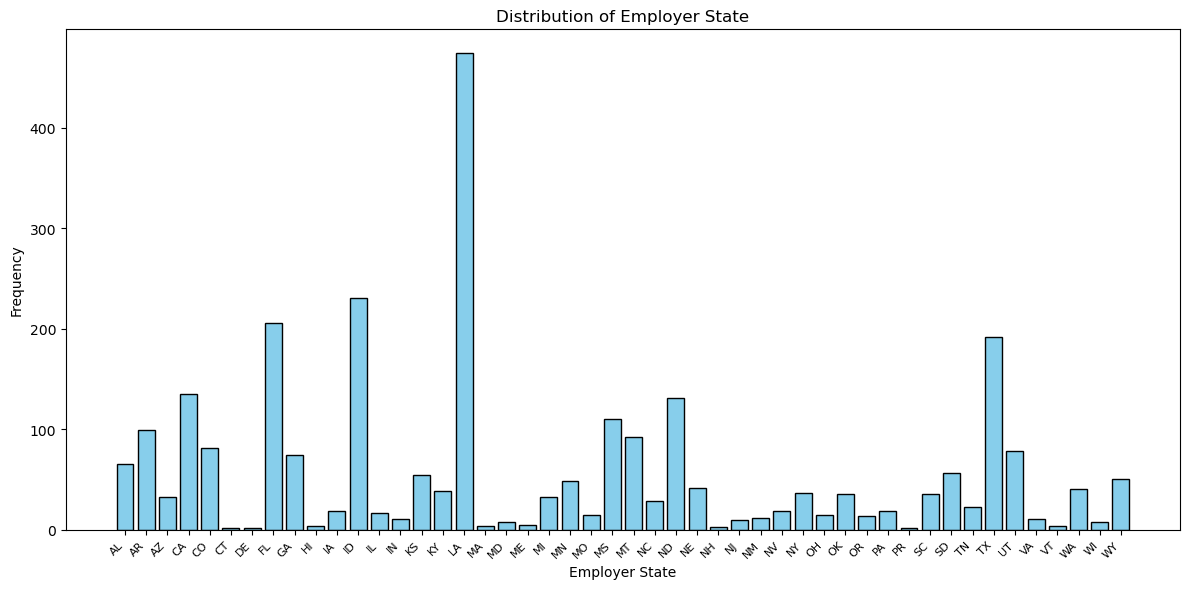

In [21]:
## your code here for 1 point of extra credit 
import matplotlib.pyplot as plt #for the extra credit 

# Sorting the states alphabetically for visualization
sorted_states = jobs['EMPLOYER_STATE'].value_counts().sort_index()

# Plotting the frequency with which states are the employee state 
plt.figure(figsize=(12, 6))
plt.bar(sorted_states.index, sorted_states.values, color='skyblue', edgecolor='black')  # Use bar plot instead of hist
plt.xlabel('Employer State')
plt.xlabel('Employer State')
plt.ylabel('Frequency')
plt.title('Distribution of Employer State')
plt.xticks(rotation=45, ha = 'right', fontsize = 8)
plt.tight_layout()
plt.show()


In [22]:
## your code here for 3 points of extra credit 

from geopy.geocoders import Nominatim
import geopandas as gpd
import matplotlib.pyplot as plt
import time

# Initialize Nominatim geocoder
geolocator = Nominatim(user_agent="geocoding_app")

# Function to geocode an address with error handling and retry mechanism
def geocode_address(address):
    max_retries = 3
    retry_delay = 1  # Delay in seconds before retrying
    for _ in range(max_retries):
        try:
            location = geolocator.geocode(address, timeout = 2)
            if location:
                return location.latitude, location.longitude
            else:
                return None
        except Exception as e:
            print(f"Error geocoding address '{address}': {e}")
            print("Retrying after {} seconds...".format(retry_delay))
            time.sleep(retry_delay)
    print(f"Failed to geocode address '{address}' after {max_retries} retries")
    return None

# jobs dataframe with the employer address column
jobs['latitude'], jobs['longitude'] = zip(*jobs['EMPLOYER_ADDRESS_1'].apply(geocode_address))

# Load the map of Georgia
georgia_map = gpd.read_file('path_to_georgia_shapefile.shp')

# Create a GeoDataFrame from the geocoded points
points_gdf = gpd.GeoDataFrame(jobs, geometry=gpd.points_from_xy(jobs.longitude, jobs.latitude))

# Plot the map of Georgia
ax = georgia_map.plot(color='lightblue', edgecolor='black', figsize=(10, 10))

# Plot the points on top of the map
points_gdf.plot(ax=ax, color='red', markersize=5)

plt.show()


Error geocoding address '1149 N CR 22': HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=1149+N+CR+22&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=2)"))
Retrying after 1 seconds...
Error geocoding address '1149 N CR 22': HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=1149+N+CR+22&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=2)"))
Retrying after 1 seconds...
Error geocoding address '1149 N CR 22': HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=1149+N+CR+22&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=2)"))
Retry

TypeError: 'NoneType' object is not iterable